In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC


In [2]:
train=pd.read_csv('Iris.csv')


In [3]:
data=train.copy()


In [4]:
data.head(10)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [5]:
data.shape


(150, 6)

In [6]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [7]:
data.drop(['Id'],axis=1,inplace=True)

In [8]:
data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [10]:
data.index

RangeIndex(start=0, stop=150, step=1)

In [11]:
data.isnull().any()

SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

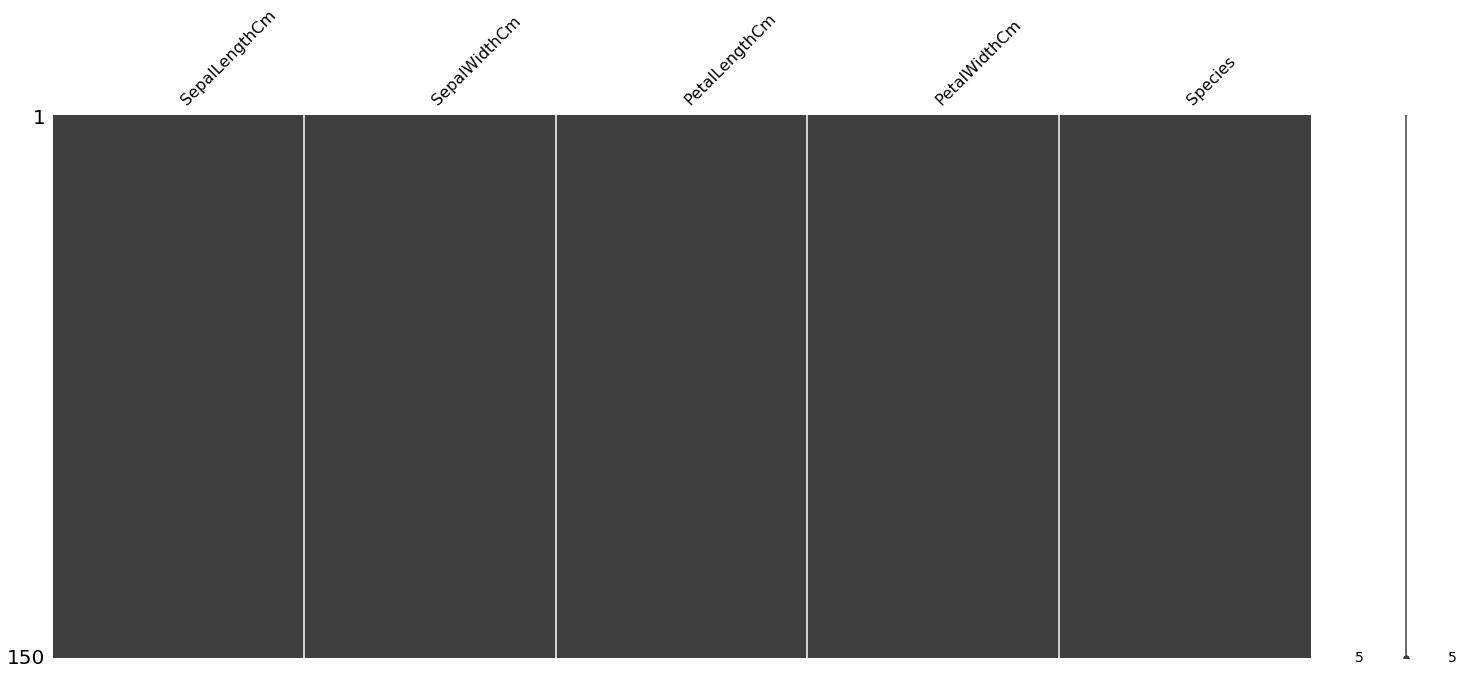

In [13]:
msno.matrix(data)

In [14]:
for col in data.columns:
    print("Number of values in column " ,col," : ",data[col].count())

Number of values in column  SepalLengthCm  :  150
Number of values in column  SepalWidthCm  :  150
Number of values in column  PetalLengthCm  :  150
Number of values in column  PetalWidthCm  :  150
Number of values in column  Species  :  150


In [16]:

data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [19]:

def plot(feature):
    fig,axes=plt.subplots(1,2)
    sns.boxplot(data=data,x=feature,ax=axes[0])
    sns.distplot(a=data[feature],ax=axes[1],color='#ff4125')
    fig.set_size_inches(15,5)

C:\Users\HP\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


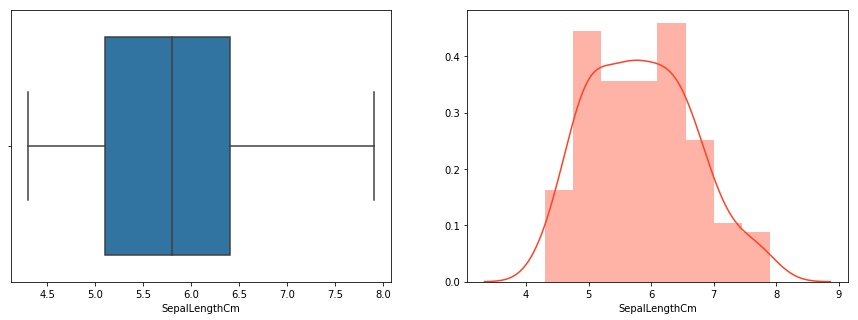

In [20]:
plot('SepalLengthCm')


C:\Users\HP\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


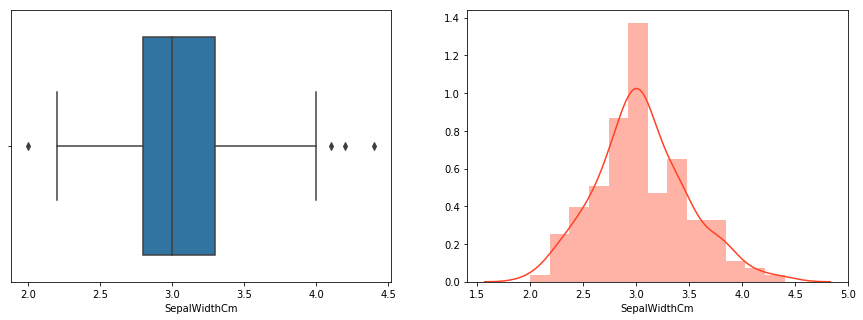

In [21]:
plot('SepalWidthCm')


C:\Users\HP\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


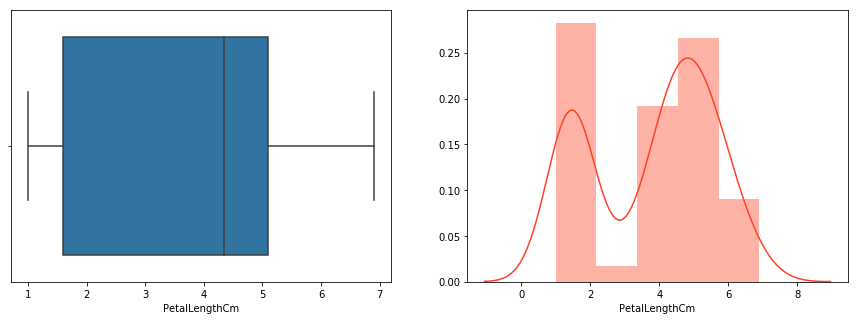

In [22]:
plot('PetalLengthCm')


C:\Users\HP\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


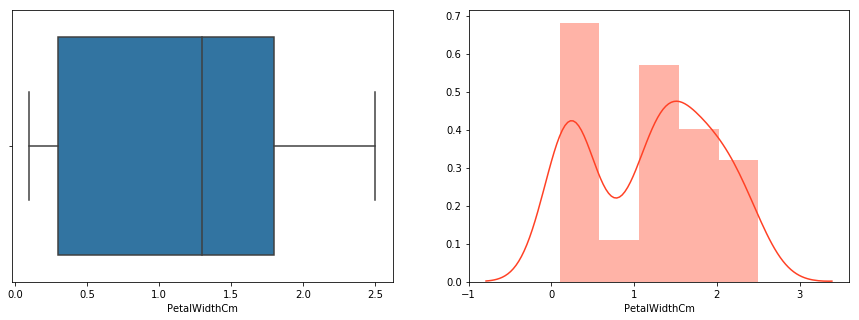

In [23]:
plot('PetalWidthCm')


In [24]:
le=LabelEncoder()
data['Species']=le.fit_transform(data['Species'])

In [28]:
data.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [31]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=42)


In [55]:
clf_lr=LogisticRegression(C=6)
clf_lr.fit(x_train,y_train)
pred=clf_lr.predict(x_test)
print(accuracy_score(pred,y_test))
Accuracy=[]
Accuracy.append(accuracy_score(pred,y_test))


0.9666666666666667


In [56]:
clf_svm_lin=LinearSVC()
clf_svm_lin.fit(x_train,y_train)
pred=clf_svm_lin.predict(x_test)
print(accuracy_score(pred,y_test))
Accuracy.append(accuracy_score(pred,y_test))

1.0


In [57]:

modl = ['LogosticRegression',"LinearSVM"]
d={'Modelling Algo':modl,'Accuracy':Accuracy}

In [58]:
acc_frame=pd.DataFrame(d)
acc_frame

,Modelling Algo,Accuracy
0,LogosticRegression,0.966667
1,LinearSVM,1.000000


TypeError: boxplot() got an unexpected keyword argument 'kind'

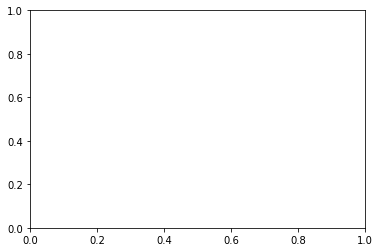

In [61]:
sns.boxplot(data=acc_frame,y='Modelling Algo',x='Accuracy',kind='bar',size=5,aspect=1.5)